## Compute Pearson Correlation Coefficients



The correlation coefficients computed from each batch size stayed within the range of 0.45-0.66. The aggregate coefficient came out to be about 0.6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
batch_sizes = [2 ** x for x in range(0, 8)]

In [3]:
# compute the correlation coefficient 
# between accuracy drop and entropy for each batch size
per_batch_coef = []
for batch_size in batch_sizes:
    with open("./out/dslr_ref/accuracy_%s.json" % batch_size) as file:
        accuracy = json.load(file)
    with open("./out/dslr_ref/entropies_%s.json" % batch_size) as file:
        entropy = json.load(file)
    x = 0.9844559585492227 - np.array(accuracy["0"] + accuracy["1"] + accuracy["2"])
    y = np.array(entropy["0"] + entropy["1"] + entropy["2"])
    per_batch_coef.append(np.corrcoef(x, y)[0, 1])
    

In [4]:
per_batch_coef

[0.651987851933392,
 0.5498573879573936,
 0.5348262824375986,
 0.4948375462595068,
 0.5538901115129264,
 0.45736931864443914,
 0.5315206303262795,
 0.6572936497559397]

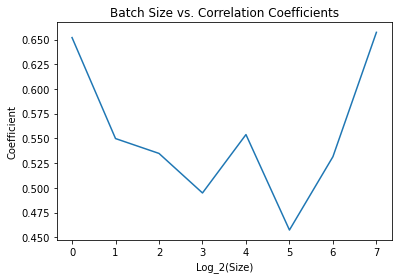

In [5]:
plt.plot(range(0, 8), per_batch_coef)
plt.title("Batch Size vs. Correlation Coefficients")
plt.xticks(range(0, 8))
plt.xlabel("Log_2(Size)")
plt.ylabel("Coefficient")
plt.show()

In [6]:
# compute the correlation coefficent over samples from all batch sizes
_accuracy = []
_entropy = []
for batch_size in batch_sizes:
    with open("./out/dslr_ref/accuracy_%s.json" % batch_size) as file:
        accuracy = json.load(file)
    with open("./out/dslr_ref/entropies_%s.json" % batch_size) as file:
        entropy = json.load(file)
    _accuracy += accuracy["0"] + accuracy["1"] + accuracy["2"]
    _entropy += entropy["0"] + entropy["1"] + entropy["2"]

x = 0.9844559585492227 - np.array(_accuracy)
y = np.array(_entropy)
np.corrcoef(x, y)[0, 1]

0.593795663626653

## Confusion

TPR = TP / (TP + FN)

FPR = FP / (FP + TN)

In [7]:
with open("./out/dslr_ref/confusion.json") as file:
    confusion = json.load(file)
confusion

{'1': {'fpr': [0.6206099815157117], 'tpr': [0.9975624619134674]},
 '2': {'fpr': [0.6883116883116883], 'tpr': [0.9536423841059603]},
 '4': {'fpr': [0.8063063063063063], 'tpr': [0.9876373626373627]},
 '8': {'fpr': [0.8857142857142857], 'tpr': [0.9950617283950617]},
 '16': {'fpr': [0.975609756097561], 'tpr': [1.0]},
 '32': {'fpr': [1.0], 'tpr': [1.0]},
 '64': {'fpr': [1.0], 'tpr': [1.0]},
 '128': {'fpr': [1.0], 'tpr': [1.0]}}

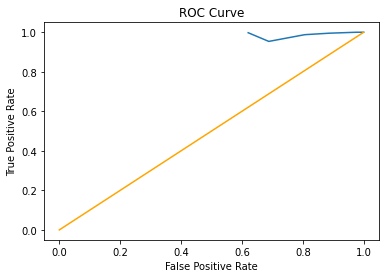

In [8]:
plt.plot([confusion[str(2**x)]["fpr"][0] for x in range(0, 8)], [confusion[str(2**x)]["tpr"][0] for x in range(0, 8)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
x = np.linspace(0, 1, 10000)
plt.plot(x, x, color="orange")
plt.show()

## Plot Evaluation Time

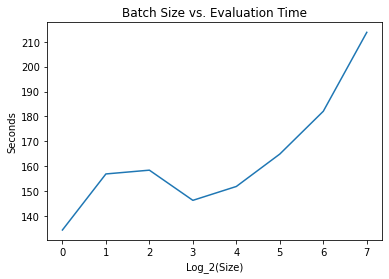

In [9]:
with open("./out/dslr_ref/time_per_batch.json") as file:
    time_b = json.load(file)
plt.plot(range(0, 8), [time_b[str(2 ** x)] for x in range(0, 8)])
plt.xlabel("Log_2(Size)")
plt.ylabel("Seconds")
plt.title("Batch Size vs. Evaluation Time")
plt.show()